# Plotting Atomic Orbital radial distribution functions

The 1s orbital radial distribution function can be computed according the the equations below. The radial wavefunction is separated out from the angular component (which will be ignored for plotting the distribution function, so no distinction of Px vs Py etc):

$ R_{1s} = 2 \times Z^{3/2}  \times e^{-\rho/2} $

$ Y_{1s} = (1/4 \pi)^{1/2} $

$ \psi_{1s} = R_{1s} \times Y_{1s} $

$ D_{1s} = 4 \pi r^2 * {\psi_{1s}}^2 $

I have coded up the functions for all n=1-4 orbitals below:
## Radial distribution code

In [27]:
import numpy as np
import matplotlib.pyplot as plt

r = np.arange(0.1,40,0.05)

#Formulas straight from https://winter.group.shef.ac.uk/orbitron/
def rad_dis(n,l,r):
    Z = 1
    rho = (2*Z*r) / n
    
    a = Z**(3/2) * np.exp(-rho/2) #This is commonly reused
    b = (1 / (4*np.pi))**2
    
    if n == 1:
        R = 2 * a
    elif n == 2:
        if l == 's':
            R = ( 1/(2*np.sqrt(2)) ) * (2 - rho) * a
        elif l == 'p':
             R = ( 1/(2*np.sqrt(6)) ) * rho * a
    elif n == 3:
        if l == 's':
            R = ( 1/(9*np.sqrt(3)) )* (6 - 6*rho + rho**2) * a
        if l == 'p':
            R = ( 1/(9*np.sqrt(6)) )* rho*(4-rho) * a
        if l == 'd':
            R = ( 1/(9*np.sqrt(6)) )* rho**2 * a
    elif n == 4:
        if l == 's':
            R = (1/96) * (24 - 36*rho + 12*rho**2 - rho**3) * a
        elif l == 'p':
            R = (1 /(32*np.sqrt(15))) * rho*(20 - 10*rho + rho**2) * a
        elif l == 'd':
            R = (1 /(96*np.sqrt(5))) * (6 - rho)*rho**2 * a
        elif l == 'f':
            R = (1 /(96*np.sqrt(35))) * rho**3 * a
 

#Not used except for spherical symmetric (s) orbitals
#Here for completeness, but no x,y,z parameters used
    if l == 's':
        Y = b 
    elif l == 'p':
        Y = np.sqrt(3)/r * b
    elif l == 'd':
        Y = np.sqrt(60/4) * b
    elif l == 'f':
        Y = np.sqrt(7/4) * ((-3*r**2)/ r**3) * b
        
    psi = R * Y
    if l == 's':
        D = 4 * np.pi * (r ** 2) * (psi ** 2)
    else:
        D = r**2 * R**2
        
    D = D / D.sum() # Normalise
    return D

### Plotting 's' functions on one graph

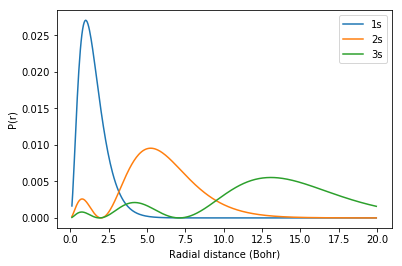

In [17]:
D_1s = rad_dis(1,'s',r)
D_2s = rad_dis(2,'s',r)
D_3s = rad_dis(3,'s',r)

plt.plot(r, D_1s, label='1s')
plt.plot(r, D_2s, label='2s')
plt.plot(r, D_3s, label='3s')

plt.ylabel('P(r)')
plt.xlabel('Radial distance (Bohr)')
plt.legend()
plt.savefig('s-orbitals.png')

### Plotting 'n = 3' functions on one graph

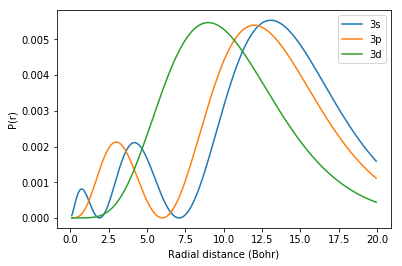

In [18]:
D_3s = rad_dis(3,'s',r)
D_3p = rad_dis(3,'p',r)
D_3d = rad_dis(3,'d',r)

plt.plot(r, D_3s, label='3s')
plt.plot(r, D_3p, label='3p')
plt.plot(r, D_3d, label='3d')


plt.ylabel('P(r)')
plt.xlabel('Radial distance (Bohr)')
plt.legend()
plt.savefig('n-3_orbitals.png')

### Plotting 'n = 3' functions on one graph

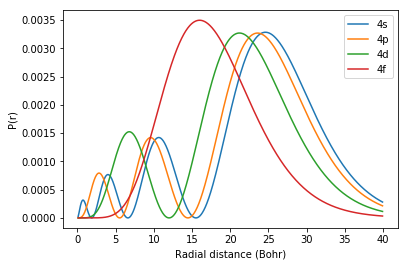

In [23]:
D_4s = rad_dis(4,'s',r)
D_4p = rad_dis(4,'p',r)
D_4d = rad_dis(4,'d',r)
D_4f = rad_dis(4,'f',r)

plt.plot(r, D_4s, label='4s')
plt.plot(r, D_4p, label='4p')
plt.plot(r, D_4d, label='4d')
plt.plot(r, D_4f, label='4f')

plt.ylabel('P(r)')
plt.xlabel('Radial distance (Bohr)')
plt.legend()
plt.savefig('n-4_orbitals.png')